# Multiple Linear Regression

## Introduction

Multiple Linear Regression is an extension of Simple Linear Regression that models the relationship between one dependent variable (target) and two or more independent variables (features).

It helps in understanding how multiple factors simultaneously influence the target variable.

---

## 🔹 Mathematical Equation

y = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + ... + βₙxₙ

Where:
- y → Dependent variable (target)
- x₁, x₂, ..., xₙ → Independent variables (features)
- β₀ → Intercept
- β₁, β₂, ..., βₙ → Coefficients of respective features

---

## 🔹 Objective

The goal is to estimate optimal coefficient values (β) that minimize the Residual Sum of Squares (RSS) using the Ordinary Least Squares (OLS) method.

---

## 🔹 Assumptions

- Linear relationship between independent and dependent variables
- No multicollinearity among independent variables
- Independence of errors
- Homoscedasticity (constant error variance)
- Normally distributed errors

---

## 🔹 Challenges

- Multicollinearity between features
- Overfitting when number of features is high
- Feature selection complexity

---

## 🔹 Applications

- House price prediction (area, location, bedrooms, age)
- Sales forecasting (advertising channels, pricing, season)
- Economic modeling
- Risk analysis

---

In this notebook, we will:
- Implement Multiple Linear Regression
- Interpret model coefficients
- Check assumptions
- Evaluate model using regression metrics

### Import Requirements 

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Create Dataset 

In [25]:
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [26]:
df=pd.DataFrame({'feature_1':X[:,0],'feature_2':X[:,1],'target':y})

In [27]:
df.shape

(100, 3)

In [28]:
df.head()

,feature_1,feature_2,target
0,-1.178020,-0.299119,37.590201
1,0.976557,-0.503292,42.915347
2,1.606198,-2.122415,73.487061
3,-0.406729,-1.344333,-9.265548
4,-0.418613,0.361563,17.107719


### Ploting 3D scatter plot 

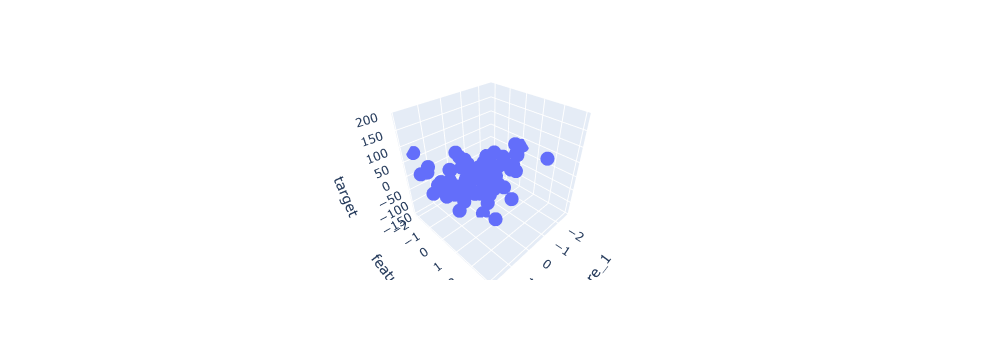

In [29]:
fig=px.scatter_3d(df,x='feature_1',y='feature_2',z='target')
fig.show()

### Train test split 

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred=lr.predict(X_test)

### Evaluate metrices 

In [34]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R2 Score",r2_score(y_test,y_pred))


MAE 44.84177092938049
MSE 2704.7319783842336
RMSE 52.00703777744156
R2 Score -0.4899739586509966


In [14]:
X=np.linspace(-5,5,10)
y=np.linspace(-5,5,10)
xGrid,yGrid=np.meshgrid(y,X)

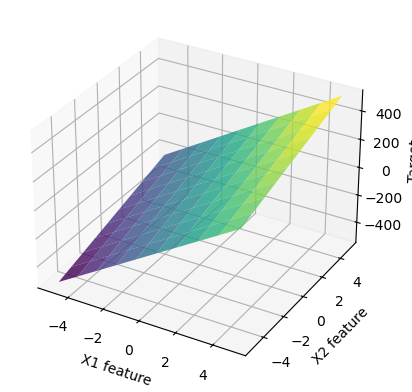

In [29]:
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)
x_grid, y_grid = np.meshgrid(x, y)
X_final = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
z_final = lr.predict(X_final).reshape(10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z_final, cmap="viridis", alpha=0.8)
ax.set_xlabel("X1 feature")
ax.set_ylabel("X2 feature")
ax.set_zlabel("Target")
plt.show()